<a href="https://colab.research.google.com/github/sam1610/Projects/blob/master/housePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

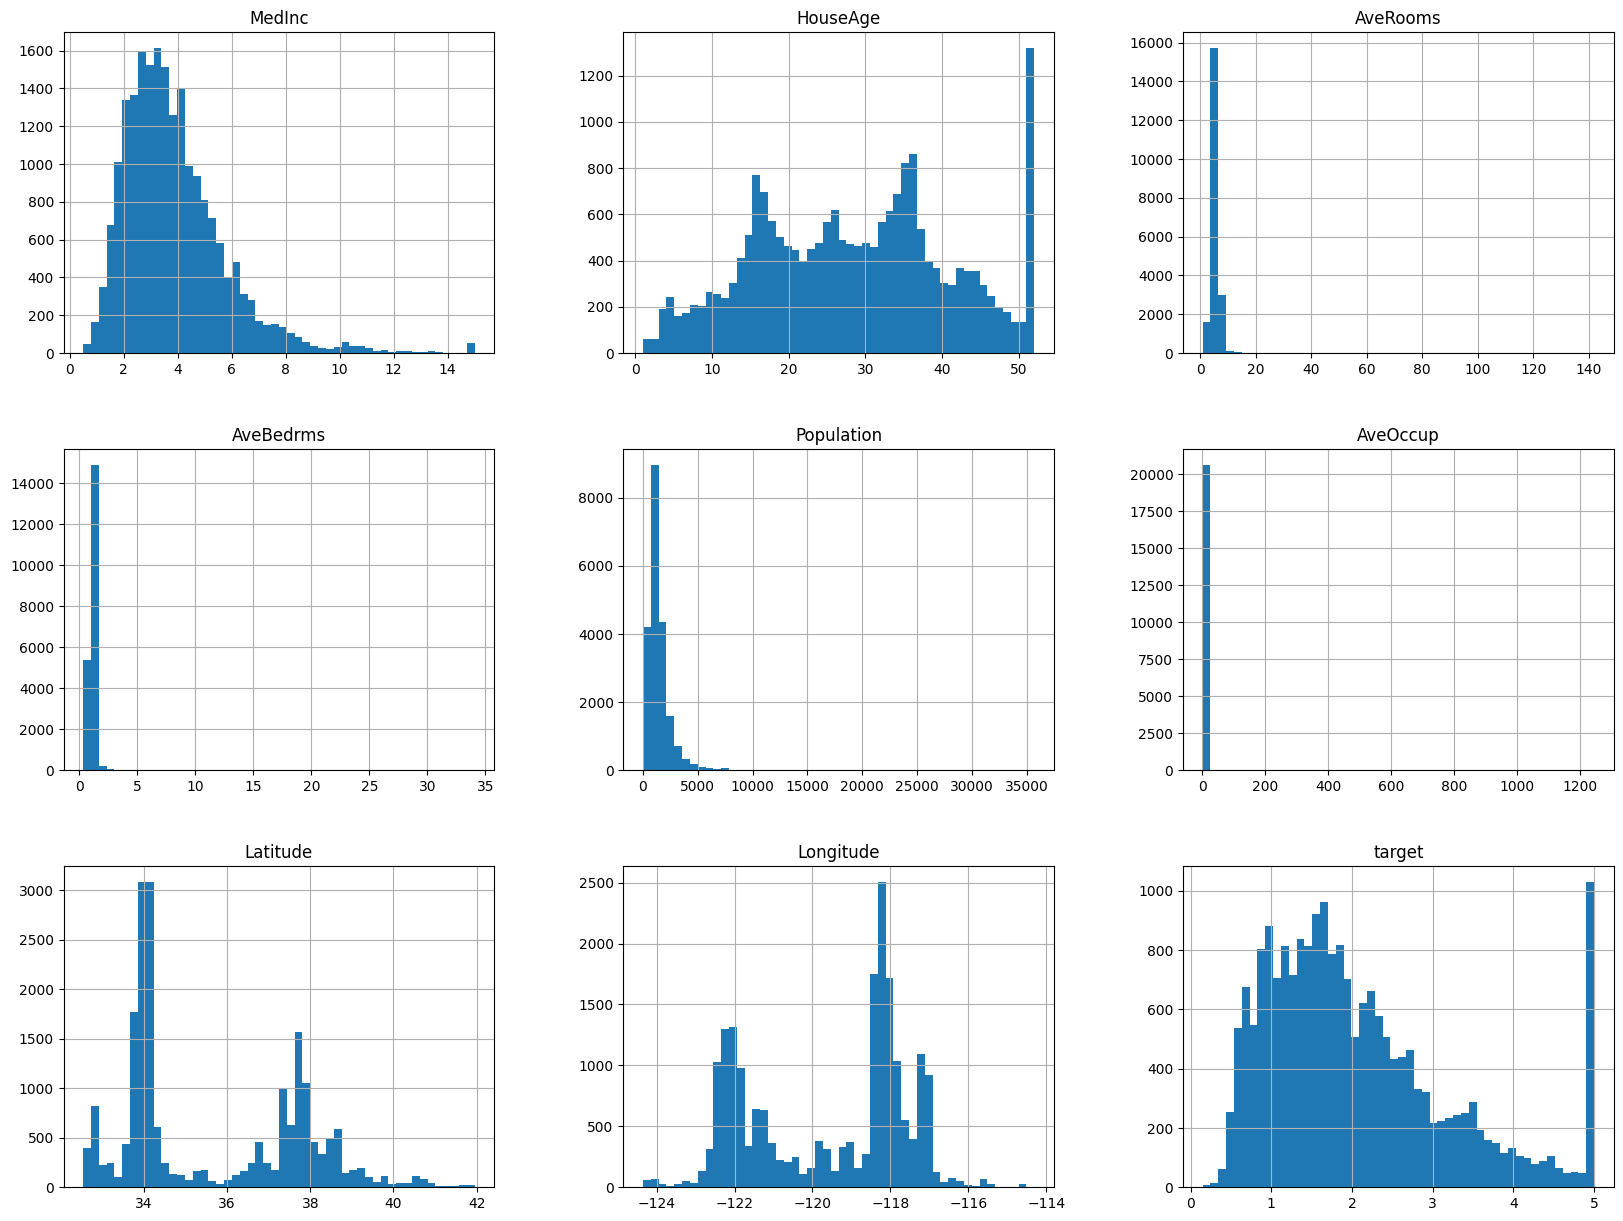

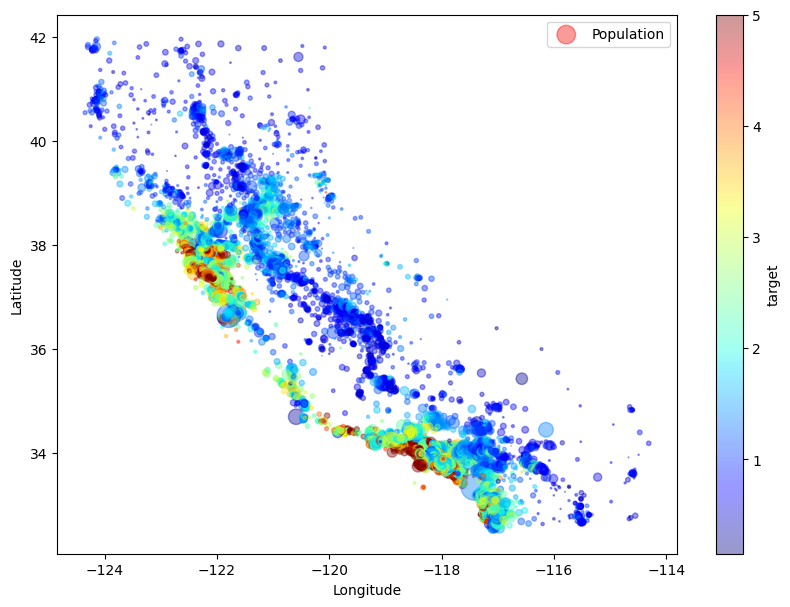

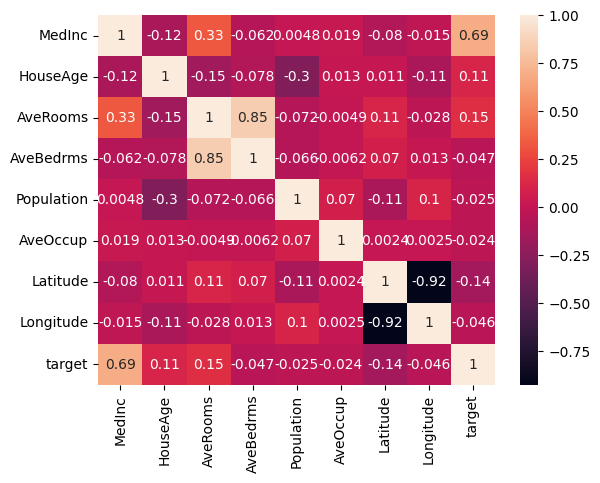

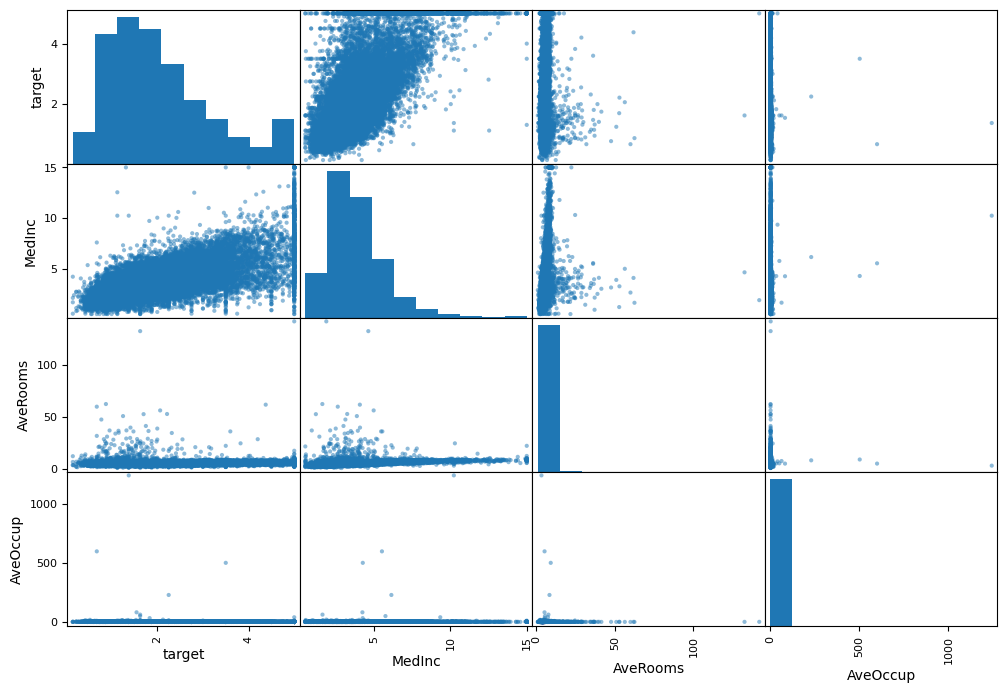

KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [1]:
# California Housing Prices - Machine Learning with Python

# This Jupyter Notebook explores the California housing prices dataset
# and builds a machine learning model to predict median house values.

# **1. Data Acquisition and Exploration**

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California housing dataset from scikit-learn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame
df = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])

# Display basic information about the dataset
print(housing.DESCR)
df.head()
df.info()
df.describe()

# **2. Data Visualization**

# Histograms for each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

# Geographical scatter plot of housing prices
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=df["Population"]/100, label="Population", figsize=(10,7),
    c="target", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Zoom in on correlations with the target variable
corr_matrix["target"].sort_values(ascending=False)

# Scatter plots for features with high correlation to target
attributes = ["target", "MedInc", "AveRooms", "AveOccup"]
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

# **3. Data Preprocessing**

# Handle missing values (if any)
# In this dataset, there are no missing values, but generally you would:
# df.fillna(df.mean(), inplace=True)  # Impute with mean
# df.dropna(inplace=True)  # Or drop rows with missing values

# Feature scaling (standardization or normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop("target", axis=1)) # Exclude target variable

# One-hot encode categorical features (if any)
# In this dataset, "ocean_proximity" is categorical
df = pd.get_dummies(df, columns=["ocean_proximity"])

# **4. Feature Engineering**

# Create new features (if needed)
# Example: combine existing features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

# **5. Model Selection and Training**

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)  # Features
y = df["target"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (e.g., Linear Regression, Decision Tree, Random Forest)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# **6. Model Evaluation**

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., RMSE, MAE, R-squared)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# **7. Model Tuning (Optional)**

# Use techniques like Grid Search or Randomized Search to find the best hyperparameters
# from sklearn.model_selection import GridSearchCV
# param_grid = {  'param1': [value1, value2], 'param2': [value1, value2]}
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_

# **8. Deployment and Monitoring (Optional)**

# Save the trained model for future use
# import joblib
# joblib.dump(model, 'california_housing_model.pkl')

# ... (Code for deployment and monitoring)